# Lab Assignment 2 - Part A: Linear Regression
Please refer to the `README.pdf` for full laboratory instructions.

## Problem Statement
A dataset is included related to red and white vinho verde wine samples, from the north of Portugal. In this exercise, we look at a subset of the data and try to **predict wine's citric acid level based on other features**.

### Dataset Description
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. **citric acid** (TARGET - what we want to predict)
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality (score between 0 and 10)

### Your Tasks
1. **Implement linear regression** from scratch using least-squares (you may use `np.linalg.lstsq()`)
2. Start with 'alcohol' and 'density' as features. **Find a 3rd feature** that improves prediction the most
3. **Find the 4th feature**. Analyze what happens with all features
4. **Provide plots** comparing predictions vs actual values

## Setup: Load the Dataset
The data is provided through `ucimlrepo`. Install and import required packages below.

In [91]:
!pip install ucimlrepo

17488.28s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [92]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
# We take 100 samples and predict the citric acid number through various features
X = wine_quality.data.features[:100]
X = X.drop(columns=['citric_acid'])
y = wine_quality.data.features[:100]['citric_acid']


# X = X.values  
# y = y.values  
print("X:", type(X))
print("y:", type(y))
print(X.shape)
print(y.shape)


X: <class 'pandas.core.frame.DataFrame'>
y: <class 'pandas.core.series.Series'>
(100, 10)
(100,)


### Write and Run Your Own Code

In [93]:
#Library declarations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [94]:
# Task 1: Implement Linear Regression
# Hint: You can use np.linalg.lstsq() or implement the normal equation: w = (X^T X)^{-1} X^T y

def linear_regression(X, y):
    # """
    # Implement linear regression using least-squares.
    
    # Parameters:
    # -----------
    # X : numpy array of shape (n_samples, n_features)
    # y : numpy array of shape (n_samples,)
    
    # Returns:
    # --------
    # coefficients : numpy array
    # """
    # w = np.linalg.inv(X.T@X)@X.T@y # w to check the correctness
    # w = w.reshape(-1,1)

    w = np.linalg.lstsq(X,y)   
    w=w[0]
    return w

    



def compute_error(X, y, w):
    # """
    # Compute the prediction error.
    
    # Returns:
    # --------
    # error : float (e.g., RMSE or L2 norm)
    # """
    # # TODO: Implement this function
    # pass

    y_pred = X @ w
    residuals = y_pred - y

    L2_norm =  np.linalg.norm(residuals)
    # L2_norm = np.sqrt(np.sum(residuals**2))

    RMSE = np.sqrt(np.mean(residuals**2))

    # RMSE = L2_norm / np.sqrt(X.shape[0])
    return L2_norm, RMSE


# w= linear_regression(X, y)
# w.shape

# print(w.dtype,w2.dtype)
# print(w.shape,w2.shape)
# print(w==w2) # float so they are not equal
# L2_norm,RMSE = compute_error(X, y, w)

## Task 2: Start with Two Features
Use 'alcohol' and 'density' as initial features. Train your model and compute the error.

In [95]:
# Create feature matrix with 'alcohol' and 'density'
X_2features = np.vstack((X['alcohol'], X['density'])).T


w_two = linear_regression(X_2features, y)
L2_norm,RMSE = compute_error(X_2features, y, w_two)

print(L2_norm,RMSE)

1.7706656223129273 0.17706656223129272


## Task 3: Find the 3rd Feature
Try adding each remaining feature one at a time. Which one improves the model the most?

**Hint**: You might want to look at correlations between features.


In [ ]:
# Firstly, we check the correlations
# corr_matrix = X.corr()
# print(X.head(10))

# high_corr = np.where(np.abs(corr_matrix) > 0.95)

# # print(high_corr)
# for i, j in zip(*high_corr):
#     if i < j:
#         print(f"Warning： '{X.columns[i]}'  and '{X.columns[j]}' have a high correlation！")


X_all = X.values

num_features = X_all.shape[1]

rank = np.linalg.matrix_rank(X_all)



print(f"The number of feature: {num_features}")

print(f"Rank: {rank}")



# TODO: Try each remaining feature and find the best 3rd feature
data_list = []
w_three_list = {}
for key in X.keys():
    if key not in ['alcohol', 'density']:
        X_new = np.vstack((X['alcohol'], X['density'], X[key])).T
        w_three= linear_regression(X_new, y)
        w_three_list[key] = w_three
        L2_norm,_ = compute_error(X_new, y, w_three)
        data_list.append({'Feature': key, 'L2_Norm': L2_norm})
df_results = pd.DataFrame(data_list)
df_results = df_results.sort_values(by='L2_Norm', ascending=True)
print(df_results)

best_feature_name = df_results.iloc[0]['Feature']  
best_w_three = w_three_list[best_feature_name]


The number of feature: 10
Rank: 10
                Feature   L2_Norm
1      volatile_acidity  1.363375
0         fixed_acidity  1.537852
6                    pH  1.654833
5  total_sulfur_dioxide  1.677401
7             sulphates  1.684767
3             chlorides  1.716155
4   free_sulfur_dioxide  1.744693
2        residual_sugar  1.769821


## Task 4: Find the 4th Feature and Full Model
Continue the analysis. What is the best 4th feature? What happens when you use all features?


In [103]:
# TODO: Find the best 4th feature



data_list = []
keys = list(X.keys())
w_four_list = {}

for i in range(len(keys)):
    key1 = keys[i]
    if key1 in ['alcohol', 'density']:
        continue
        
    # Inner loop：we continue from i+1!!!!!
    for j in range(i + 1, len(keys)):
        key2 = keys[j]
        if key2 in ['alcohol', 'density']:
            continue
        X_new = np.vstack((X['alcohol'], X['density'], X[key1], X[key2])).T
        
        w_four = linear_regression(X_new, y)
         
        w_four_list[f"{key1} & {key2}"] = w_four

        l2_norm, _ = compute_error(X_new, y, w_four)
        
        data_list.append({
            'Feature_Pair': f"{key1} & {key2}", 
            'L2_Norm': l2_norm
        })

df_results_pair = pd.DataFrame(data_list)
df_results_pair = df_results_pair.sort_values(by='L2_Norm', ascending=True)


best_pair = df_results_pair.iloc[0]
best_w_four = w_four_list[best_pair['Feature_Pair']]
print(f"\n The best pair: {best_pair['Feature_Pair']}")
print(f"The minimal L2 Norm: {best_pair['L2_Norm']}")

# TODO: Train full model with all features
X_all = np.vstack([X[key] for key in X.keys()]).T
w_full = linear_regression(X_all, y)
l2_norm, _ = compute_error(X_all, y, w_full)
print(f"The minimal L2 Norm for full model: {l2_norm}")




 The best pair: fixed_acidity & volatile_acidity
The minimal L2 Norm: 1.2416250809377438
The minimal L2 Norm for full model: 1.0623517167793375


## Task 5: Visualization
Create plots comparing model predictions vs actual values for different feature combinations.


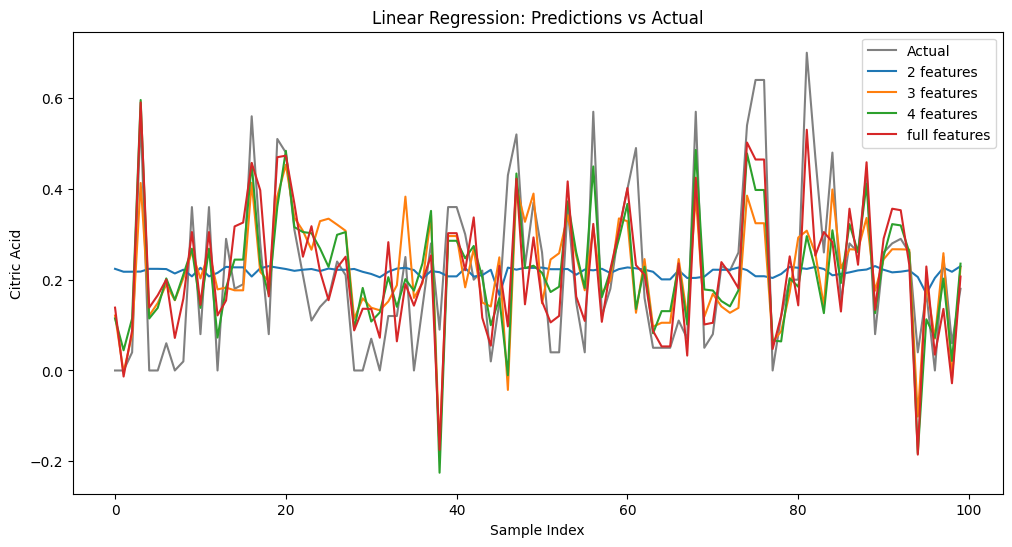

In [105]:
# TODO: Create comparison plots
# Example:
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual', color='gray')

X_2features = np.vstack((X['alcohol'], X['density'])).T
X_3features= np.vstack((X['alcohol'], X['density'], X['volatile_acidity'])).T
X_4features = np.vstack((X['alcohol'], X['density'], X['fixed_acidity'] , X['volatile_acidity'])).T


plt.plot(X_2features @ w_two, label='2 features')
plt.plot(X_3features @ best_w_three, label='3 features')
plt.plot(X_4features @ best_w_four, label='4 features')
plt.plot(X_all @ w_full, label='full features')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Citric Acid')
plt.title('Linear Regression: Predictions vs Actual')
plt.show()


## Summary and Discussion

### Results Table
| Model | Features | L2 Norm Error |
|-------|----------|-------|
| Model 1 | alcohol, density | 1.7707 |
| Model 2 | alcohol, density, volatile_acidity | 1.3634 |
| Model 3 | alcohol, density, ixed_acidity, volatile_acidity | 1.2416 |
| Full Model | all features | 1.0624 |



### Discussion
*Write your analysis here:*
- Which features are most important for predicting citric acid?

Based on the stepwise selection process, volatile_acidity and fixed_acidity emerged as the most critical predictors alongside the baseline features.

- Does adding more features always improve the model?

In this specific exercise, yes, adding more features consistently improved the model's performance on the training data. The L2 Norm dropped steadily from the initial 2-feature model (1.77) to the full 10-feature model (1.06).

However, from a machine learning perspective, this improvement only reflects training error. While the full model has the lowest error, it carries the risk of overfitting if the additional features capture noise rather than underlying patterns.


- What did you learn from this exercise?

(1) Numerical Stability: I learned that even if a matrix is mathematically Full Rank (Rank 10), it can be "ill-conditioned". This leads to overflow or divide by zero errors when using np.linalg.inv(), necessitating the use of more robust solvers like np.linalg.lstsq().


(2) Data Handling: The transition from Pandas DataFrame  to NumPy ndarrays  is a critical workflow step for implementing efficient optimization models in Python.
